In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_csv('./Traffic_Tickets_Issued__Four_Year_Window.csv')

C:\Users\dacrands\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data overview and cleaning

In [3]:
len(traffic_tickets)

6298032

In [4]:
traffic_tickets.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,306B,UNINSPECTED MOTOR VEHICLE,2016,3.0,TUESDAY,21.0,M,NEW YORK,1000 ISLAND ST PRK POLICE,ADAMS TOWN COURT,TSLED
1,1180B,SPEED OVER 55 ZONE,2016,3.0,SATURDAY,18.0,F,NEW YORK,1000 ISLAND ST PRK POLICE,ADAMS TOWN COURT,TSLED
2,1180B,SPEED OVER 55 ZONE,2016,2.0,WEDNESDAY,55.0,M,NEW YORK,1000 ISLAND ST PRK POLICE,ADAMS TOWN COURT,TSLED
3,1180D,SPEED IN ZONE,2016,2.0,SUNDAY,41.0,M,NEW YORK,1000 ISLAND ST PRK POLICE,ADAMS TOWN COURT,TSLED
4,1180B,SPEED OVER 55 ZONE,2016,1.0,THURSDAY,25.0,M,NEW YORK,1000 ISLAND ST PRK POLICE,ADAMS TOWN COURT,TSLED


### Create new dframe with cols of interest

In [5]:
cols_of_interest = ["Violation Description", "Violation Year", "Violation Day of Week", "Age at Violation", "State of License", "Gender"]

traffic_tickets = traffic_tickets[cols_of_interest]

In [6]:
traffic_tickets.head()

,Violation Description,Violation Year,Violation Day of Week,Age at Violation,State of License,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,THURSDAY,25.0,NEW YORK,M


In [7]:
traffic_tickets.columns

Index(['Violation Description', 'Violation Year', 'Violation Day of Week',
       'Age at Violation', 'State of License', 'Gender'],
      dtype='object')

In [8]:
traffic_tickets = traffic_tickets.rename(columns={
    'Violation Description': 'Violation', 
    'Violation Year': 'Year', 
    'Violation Day of Week': 'DayOfWeek',
    'Age at Violation': 'Age', 
    'State of License': 'State'
})

In [9]:
traffic_tickets.tail()

,Violation,Year,DayOfWeek,Age,State,Gender
6298027,OPER MV WHILE USING PORTABLE ELEC DEV,20{,NaN,NaN,NaN,NaN
6298028,NaN,NaN,NaN,NaN,NaN,NaN
6298029,NaN,NaN,NaN,NaN,NaN,NaN
6298030,NaN,NaN,NaN,NaN,NaN,NaN
6298031,NaN,NaN,NaN,NaN,NaN,NaN


It seems there are some crummy values at in this dframe, likely the ones that threw an error in line 2. Lets remove them.

In [10]:
traffic_tickets[:6298027]

,Violation,Year,DayOfWeek,Age,State,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,THURSDAY,25.0,NEW YORK,M
5,DRIVING WHILE INTOXICATED,2014,SUNDAY,56.0,COLORADO,F
6,DRIVING W/.08 OF 1 PERCENT OF ALCO/BLD,2014,SUNDAY,56.0,COLORADO,F
7,INSUFF TURN SIGNAL-LESS THAN 100 FEET,2014,SUNDAY,56.0,COLORADO,F
8,SPEED OVER 55 ZONE,2014,MONDAY,24.0,NEW YORK,F
9,OPERATING MV MOBILE PHONE,2014,MONDAY,35.0,NEW YORK,M


In [11]:
traffic_tickets = traffic_tickets[:6298027]

traffic_tickets.tail()

,Violation,Year,DayOfWeek,Age,State,Gender
6298022,OPERATING MV MOBILE PHONE,2017,MONDAY,29.0,NEW YORK,M
6298023,PLATE MISSING/INSECURE/DIRTY,2017,MONDAY,46.0,NEW YORK,M
6298024,DISOBEYED TRAFFIC DEVICE,2017,MONDAY,22.0,MARYLAND,M
6298025,IMPROPER SIGNAL,2017,MONDAY,36.0,NEW JERSEY,M
6298026,COM VEH ON PKWAY NYC,2017,MONDAY,42.0,NEW YORK,M


In [12]:
traffic_violations_set = set(traffic_tickets.Violation)

In [13]:
len(traffic_violations_set)

850

In [14]:
traffic_violations_set

{'1990/NEWER SCH BUS NO BACKUP BEEPER',
 'ABANDONED VEHICLE',
 'ABANDONED VEHS-TBTA',
 'ABANDONING VEHICLE',
 'AGG DWAI IMPAIRED COMB DRUGS - DRUGS/ALCOHOL',
 'AGG DWI - CHILD IN VEHICLE',
 'AGG FAIL TO ANSWER APPEARANCE TICKET',
 'AGGRAVATED DWI - BLOOD ALCOHOL CONTENT .18 OR HIGH',
 'AGGRAVATED UNLIC OPER 1ST DEGREE',
 'AGGRAVATED UNLIC OPER 2ND MAND SUSP',
 'AGGRAVATED UNLIC OPER 2ND/PREV CONV',
 'AGGRAVATED UNLIC OPER 3 PLUS SUSPENSION',
 'AGGRAVATED UNLIC OPER 3RD MISD',
 'AGGRAVATED UNLIC OPER-2ND DEG',
 'AGGRAVATED UNLIC OPER-2ND DEG-ALC',
 'ALLOWING USE OF LICENSE BY ANOTHER',
 'ALTER DOCUMENT/PLATE',
 'ANGL PARKING/WRONG DIR/PARTLY ON RDWY',
 'ANGLE PARKING/MORE 12IN FROM CURB/2 WY RD',
 'ASSAULT-MOT VEHICLE',
 'ATTACHING SELF TO MOVING MOTOR VEHICLE',
 'AVOID INTERSECTN NYC',
 'AVOIDING TRAF DEVICE OR INTERSECTION',
 'BACK SEAT PASS AGE 4-7 NO/IMPROPER RESTRAINT',
 'BACK SEAT PASS AGE 8-15 NO/IMPROPR SEAT BELT',
 'BACK SEAT PASS LESS THAN 4 NO/IMP RESTRAINT',
 'BACKING ON CON

In [15]:
traffic_tickets.Violation.value_counts()

SPEED IN ZONE                                             723759
DISOBEYED TRAFFIC DEVICE                                  425798
SPEED OVER 55 ZONE                                        324698
UNINSPECTED MOTOR VEHICLE                                 303581
UNLICENSED OPERATOR                                       251487
SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT                     248754
OPERATING MV MOBILE PHONE                                 229418
FLD TO STOP AT STOP SIGN                                  191255
SPEED IN ZONE 11-30                                       182455
NO/INADEQUATE HEADLAMPS                                   160802
OPERATING W/O INSURANCE                                   148981
OPER MV WHILE USING PORTABLE ELEC DEV                     147689
NO SEAT BELT ADULT                                        138906
INADEQUATE OR NO STOP LAMPS                               128817
AGGRAVATED UNLIC OPER 3RD MISD                            124330
UNREGISTERED MOTOR VEHICL

In [16]:
age_set = set(traffic_tickets.Age)

In [17]:
len(age_set)

67372

In [19]:
traffic_tickets.Age.mean()

36.63150639531291

In [20]:
traffic_tickets.Age.median()

34.0

In [21]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

(array([  3.58643000e+05,   8.37276000e+05,   8.56307000e+05,
          7.24647000e+05,   6.10411000e+05,   5.14837000e+05,
          4.42856000e+05,   4.30423000e+05,   3.94801000e+05,
          3.49807000e+05,   2.68862000e+05,   1.83934000e+05,
          1.17310000e+05,   6.84470000e+04,   3.71080000e+04,
          1.87360000e+04,   9.38500000e+03,   4.71200000e+03,
          1.71700000e+03,   5.16000000e+02]),
 array([ 16.  ,  19.95,  23.9 ,  27.85,  31.8 ,  35.75,  39.7 ,  43.65,
         47.6 ,  51.55,  55.5 ,  59.45,  63.4 ,  67.35,  71.3 ,  75.25,
         79.2 ,  83.15,  87.1 ,  91.05,  95.  ]),
 <a list of 20 Patch objects>)

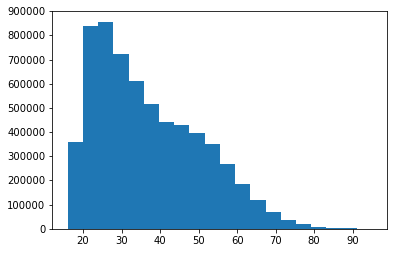

In [22]:
plt.hist(traffic_tickets.Age.dropna(), bins=20)

In [27]:
traffic_tickets.Gender.value_counts()

M    4433132
F    1802023
C      62872
Name: Gender, dtype: int64

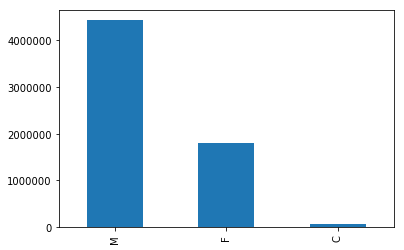

In [44]:
traffic_tickets.Gender.value_counts().plot(kind="bar")

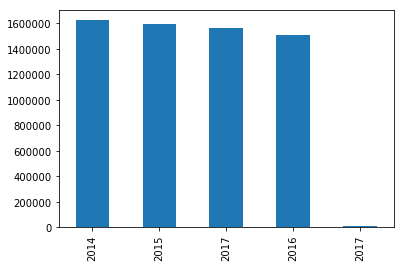

In [45]:
traffic_tickets.Year.value_counts().plot(kind="bar")

In [47]:
set(traffic_tickets.Year)

{2016, 2017, '2017', 2014, 2015}

Well, there seems to be a string in there, so let's convert that to an int.

In [49]:
temp_df = traffic_tickets.replace(to_replace="2017", value=2017)
set(temp_df.Year)

{2014, 2015, 2016, 2017}

Ok, our little test worked, now let's reassign our dframe to this clean one

In [50]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

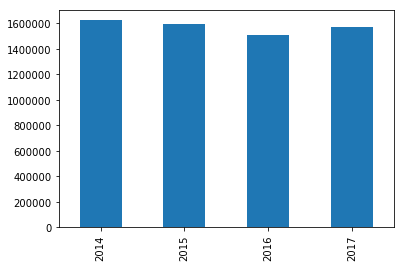

In [67]:
traffic_tickets.Year.value_counts()[[2014, 2015, 2016, 2017]].plot(kind="bar")